In [25]:
from PIL import Image
import requests
import json

In [40]:
def get_manifest(urn):
    r = requests.get("https://api.nb.no/catalog/v1/iiif/{urn}/manifest".format(urn=urn))
    return r.json()

In [12]:
def super_search(term):
    r = requests.get("https://api.nb.no:443/catalog/v1/search", params = {'q':term, 'filter':'mediatype:bilder'})
    return r.json()

In [28]:
def load_picture(url):
    r = requests.get(url, stream=True)
    r.raw.decode_content=True
    #print(r.status_code)
    return r.raw

In [107]:
def find_picture(term):
    x = super_search(term)
    urns = [f['metadata']['identifiers']['urn'] for f in  x['_embedded']['mediaTypeResults'][0]['result']['_embedded']['items'] if 'urn' in f['metadata']['identifiers']]
    found = [get_manifest(urn) for urn in urns]
    return [p['sequences'][0]['canvases'][0]['images'][0]['resource']['@id'] for p in found]

In [130]:
picture = lambda result, i, size: result['_embedded']['mediaTypeResults'][0]['result']['_embedded']['items'][i]['_links']['thumbnail_custom']['href'].format(width=0, height=size)

In [ ]:
def find_thumbnail(term, width):
    x = super_search(term)
    urns = [f['metadata']['identifiers']['urn'] for f in  x['_embedded']['mediaTypeResults'][0]['result']['_embedded']['items'] i

In [108]:
pics = find_picture('nidarosdomen')

In [109]:
r = load_picture('https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digifoto_20141212_00053_NB_MIT_FNR_21371/full/0,200/0/native.jpg')

In [110]:
pics

['https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digifoto_20151218_00131_blds_07657/full/full/0/native.jpg',
 'https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digifoto_20170515_00067_NB_MIT_ENR_03622/full/full/0/native.jpg',
 'https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digifoto_20141212_00053_NB_MIT_FNR_21371/full/full/0/native.jpg',
 'https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digifoto_20141212_00048_NB_MIT_FNR_21372/full/full/0/native.jpg',
 'https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digifoto_20141212_00051_NB_MIT_FNR_21373/full/full/0/native.jpg',
 'https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digifoto_20141212_00050_NB_MIT_FNR_21370/full/full/0/native.jpg',
 'https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digifoto_20141216_00023_NB_MIT_FNR_18305/full/full/0/native.jpg',
 'https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digifoto_20141216_00027_NB_MIT_FNR_18310/full/full/0/native.jpg',
 'https://www.

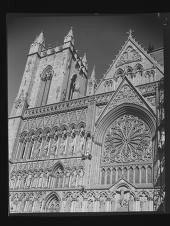

In [32]:
Image.open(r)

In [35]:
requests.get("https://api.nb.no/catalog/v1/iiif/URN:NBN:no-nb_digifoto_20150223_00091_bldsa_HA0200/manifest").json()

{'@context': 'http://iiif.io/api/presentation/2/context.json',
 '@type': 'sc:Manifest',
 '@id': 'https://api.nb.no/catalog/v1/iiif/URN:NBN:no-nb_digifoto_20150223_00091_bldsa_HA0200/manifest{?fields,profile}',
 'label': '[Knut Hamsun med datteren, Ellinor, 1944]',
 'metadata': [{'label': 'Tittel',
   'value': '[Knut Hamsun med datteren, Ellinor, 1944]'},
  {'label': 'Dato', 'value': '05.07.1944'},
  {'label': 'Andre opplysninger',
   'value': 'En face, halvfigur, Knut Hamsun har solkorset på jakkeslaget\n\nfamilier - hjulkors - solkors - symboler\nminnefotografier - portrettfotografi'},
  {'label': 'Fotograf', 'value': 'Ukjent'},
  {'label': 'Avbildet', 'value': 'Hamsun, Ellinor | Hamsun, Knut'},
  {'label': 'Sted', 'value': 'Norge, Aust-Agder, Grimstad'},
  {'label': 'Kilde for metadata',
   'value': 'mavis.nb.no (/TitleWork/key/662454)'},
  {'label': 'Medietype', 'value': 'bilder'},
  {'label': 'Tilgang', 'value': 'Tilgang for alle'},
  {'label': 'Varig lenke',
   'value': '<a href="

In [41]:
get_manifest('URN:NBN:no-nb_digifoto_20150223_00091_bldsa_HA0200')

{'@context': 'http://iiif.io/api/presentation/2/context.json',
 '@type': 'sc:Manifest',
 '@id': 'https://api.nb.no/catalog/v1/iiif/URN:NBN:no-nb_digifoto_20150223_00091_bldsa_HA0200/manifest{?fields,profile}',
 'label': '[Knut Hamsun med datteren, Ellinor, 1944]',
 'metadata': [{'label': 'Tittel',
   'value': '[Knut Hamsun med datteren, Ellinor, 1944]'},
  {'label': 'Dato', 'value': '05.07.1944'},
  {'label': 'Andre opplysninger',
   'value': 'En face, halvfigur, Knut Hamsun har solkorset på jakkeslaget\n\nfamilier - hjulkors - solkors - symboler\nminnefotografier - portrettfotografi'},
  {'label': 'Fotograf', 'value': 'Ukjent'},
  {'label': 'Avbildet', 'value': 'Hamsun, Ellinor | Hamsun, Knut'},
  {'label': 'Sted', 'value': 'Norge, Aust-Agder, Grimstad'},
  {'label': 'Kilde for metadata',
   'value': 'mavis.nb.no (/TitleWork/key/662454)'},
  {'label': 'Medietype', 'value': 'bilder'},
  {'label': 'Tilgang', 'value': 'Tilgang for alle'},
  {'label': 'Varig lenke',
   'value': '<a href="

In [43]:
_41['metadata']

[{'label': 'Tittel', 'value': '[Knut Hamsun med datteren, Ellinor, 1944]'},
 {'label': 'Dato', 'value': '05.07.1944'},
 {'label': 'Andre opplysninger',
  'value': 'En face, halvfigur, Knut Hamsun har solkorset på jakkeslaget\n\nfamilier - hjulkors - solkors - symboler\nminnefotografier - portrettfotografi'},
 {'label': 'Fotograf', 'value': 'Ukjent'},
 {'label': 'Avbildet', 'value': 'Hamsun, Ellinor | Hamsun, Knut'},
 {'label': 'Sted', 'value': 'Norge, Aust-Agder, Grimstad'},
 {'label': 'Kilde for metadata',
  'value': 'mavis.nb.no (/TitleWork/key/662454)'},
 {'label': 'Medietype', 'value': 'bilder'},
 {'label': 'Tilgang', 'value': 'Tilgang for alle'},
 {'label': 'Varig lenke',
  'value': '<a href="https://urn.nb.no/URN:NBN:no-nb_digifoto_20150223_00091_bldsa_HA0200" target="_blank">https://urn.nb.no/URN:NBN:no-nb_digifoto_20150223_00091_bldsa_HA0200</a>'},
 {'label': '',
  'value': '<a href="https://www.nb.no/items/e98f1d8bd2d8c0a334e0f2de8ee38ba9?manifest=https://api.nb.no/catalog/v1/

In [44]:
_41.keys()

dict_keys(['@context', '@type', '@id', 'label', 'metadata', 'description', 'license', 'attribution', 'thumbnail', 'sequences'])

In [45]:
_41['license']

'https://www.nb.no/lisens/publicdomain'

In [106]:
_41['sequences'][0]['canvases'][0]['images'][0]['resource']['@id']

'https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digifoto_20150223_00091_bldsa_HA0200/full/full/0/native.jpg'

In [37]:
 "r.raw.decode_content = True"

'r.raw.decode_content = True'

In [38]:
""""https://api.nb.no:443/catalog/v1/search{?q,page,size,sort,grouping,boost,should,aggs,searchType,topRight,bottomLeft,precision,explain,dq,digitalAccessibleOnly,filter,aq,snippets,fragments,fragSize,random,profile,expand,mediaTypeOrder,mediaTypeSize}","""

'"https://api.nb.no:443/catalog/v1/search{?q,page,size,sort,grouping,boost,should,aggs,searchType,topRight,bottomLeft,precision,explain,dq,digitalAccessibleOnly,filter,aq,snippets,fragments,fragSize,random,profile,expand,mediaTypeOrder,mediaTypeSize}",'

In [114]:
x = super_search('nidarosdomen')

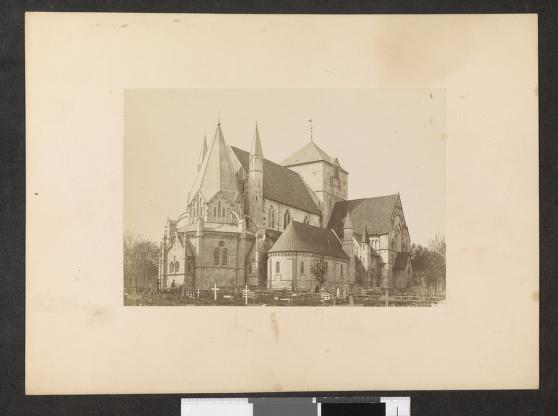

In [135]:
Image.open(load_picture(picture(x, 0, 400)))